In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prot.viz
import prot.size
import prot.estimate
colors = prot.viz.plotting_style()
dataset_colors = prot.viz.dataset_colors()
constants = prot.estimate.load_constants()

%matplotlib inline

/Users/nathanb/git/growth_limits/prot/estimate.py:66: RuntimeWarning: divide by zero encountered in true_divide
  constants['t_double'] = {'value':3600 * np.log(2) / constants['growth_rate']['value'],


## Related to Reviewer 1:

- Lets plot carbon transporters but normalize by parameter like total protein content (or cell mass).

In [2]:
data_full = pd.read_csv('../../data/compiled_absolute_measurements.csv')

data = pd.read_csv('../../data/compiled_estimate_categories.csv')
_carbon = data[data['shorthand']=='carbon_tport']


In [3]:
_carbon.head()

,aggregation_method,category,concentration_uM,condition,dataset,dataset_name,growth_rate_hr,n_complex,name,rate,rate_units,shorthand,volume
6,sum total,transport,27.043192,MOPS complete,li_2014,Li et al. 2014,1.934364,64653.078466,Carbon Importers (total),200.0,carbs/s,carbon_tport,3.97
25,sum total,transport,18.463329,MOPS complete without methionine,li_2014,Li et al. 2014,1.569390,30242.636749,Carbon Importers (total),200.0,carbs/s,carbon_tport,2.72
43,sum total,transport,55.798519,MOPS minimal,li_2014,Li et al. 2014,0.738700,38642.148129,Carbon Importers (total),200.0,carbs/s,carbon_tport,1.15
64,sum total,transport,235.266088,glucose_minimal,peebo_2015,Peebo et al. 2015,0.210000,93506.977238,Carbon Importers (total),200.0,carbs/s,carbon_tport,0.66
83,sum total,transport,262.181236,glucose_minimal,peebo_2015,Peebo et al. 2015,0.220000,105783.311837,Carbon Importers (total),200.0,carbs/s,carbon_tport,0.67


In [4]:
complexes = pd.read_csv('../../data/compiled_annotated_complexes.csv')
complexes['avg_fg_per_complex'] = complexes['fg_per_cell']/complexes['n_units']

In [5]:
complexes

,gene_name,b_number,condition,go_terms,cog_class,cog_category,cog_letter,growth_rate_hr,gene_product,tot_per_cell,fg_per_cell,dataset,dataset_name,strain,complex,complex_annotation,n_subunits,n_units,avg_fg_per_complex
0,fruK,b2168,lb_miller,GO:0008443; GO:0042803; GO:0046835; GO:0005829...,metabolism,carbohydrate transport and metabolism,G,1.900000,1-phosphofructokinase,329.297002,0.018452,schmidt_2016,Schmidt et al. 2016,BW25113,1-PFK,1-phosphofructokinase,2.0,164.648501,0.000112
1,fruK,b2168,glycerol_pAA,GO:0008443; GO:0042803; GO:0046835; GO:0005829...,metabolism,carbohydrate transport and metabolism,G,1.270000,1-phosphofructokinase,144.402554,0.008092,schmidt_2016,Schmidt et al. 2016,BW25113,1-PFK,1-phosphofructokinase,2.0,72.201277,0.000112
2,fruK,b2168,acetate,GO:0008443; GO:0042803; GO:0046835; GO:0005829...,metabolism,carbohydrate transport and metabolism,G,0.300000,1-phosphofructokinase,22.191035,0.001243,schmidt_2016,Schmidt et al. 2016,BW25113,1-PFK,1-phosphofructokinase,2.0,11.095517,0.000112
3,fruK,b2168,fumarate,GO:0008443; GO:0042803; GO:0046835; GO:0005829...,metabolism,carbohydrate transport and metabolism,G,0.420000,1-phosphofructokinase,51.282031,0.002874,schmidt_2016,Schmidt et al. 2016,BW25113,1-PFK,1-phosphofructokinase,2.0,25.641016,0.000112
4,fruK,b2168,galactose,GO:0008443; GO:0042803; GO:0046835; GO:0005829...,metabolism,carbohydrate transport and metabolism,G,0.260000,1-phosphofructokinase,78.560427,0.004402,schmidt_2016,Schmidt et al. 2016,BW25113,1-PFK,1-phosphofructokinase,2.0,39.280213,0.000112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100144,yshB,b4686,MOPS complete,no ontology,Not Assigned,Not Assigned,Not Assigned,1.934364,uncharacterized protein YshB,12356.317688,0.074211,li_2014,Li et al. 2014,MG1655,none assigned,uncharacterized protein YshB,1.0,12356.317688,0.000006
100145,yshB,b4686,MOPS complete without methionine,no ontology,Not Assigned,Not Assigned,Not Assigned,1.569390,uncharacterized protein YshB,11239.831314,0.067505,li_2014,Li et al. 2014,MG1655,none assigned,uncharacterized protein YshB,1.0,11239.831314,0.000006
100146,yshB,b4686,MOPS minimal,no ontology,Not Assigned,Not Assigned,Not Assigned,0.738700,uncharacterized protein YshB,8428.269298,0.050619,li_2014,Li et al. 2014,MG1655,none assigned,uncharacterized protein YshB,1.0,8428.269298,0.000006
100147,mgtL,b4702,MOPS complete,GO:0032026; GO:0031556,Not Assigned,Not Assigned,Not Assigned,1.934364,leader peptide MgtL,3703.153635,0.013051,li_2014,Li et al. 2014,MG1655,none assigned,leader peptide MgtL,1.0,3703.153635,0.000004


In [6]:

# # Define constants
# theta_C = constants['dry_mass_frac']['value'] * constants['theta_C']['value']
# rho = constants['density']['value']
# vol = constants['volume']['value']
# growth_rate = constants['growth_rate']['value']
# t_double = constants['t_double']['value']
# mass = constants['cell_mass']['value']
# m_carbon = 12/6E11 # in pg
# r_carbon = 1000 # in C / s
# N_tporters = (theta_C * mass)/ (m_carbon * r_carbon * t_double)

# # avg fg per transporter
# c_transporters = complexes[complexes.go_terms.str.contains('GO:0009401')]
# c_transporters = c_transporters[c_transporters.dataset == 'schmidt_2016']
# c_transporters = c_transporters[c_transporters.condition == 'glucose']
# c_mass = []
# for com, d in c_transporters.groupby('complex'):
#     c_mass = np.append(c_mass, d.avg_fg_per_complex.sum())

# complex_avg_fg = c_mass.mean()

# # complex_avg_fg = complexes[complexes.go_terms.str.contains('GO:0009401')].avg_fg_per_complex.mean()

# # Set up the figure canvas.
# fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# ax.xaxis.set_tick_params(labelsize=10)
# ax.yaxis.set_tick_params(labelsize=10)
# # ax.set_ylim([1E2, 5E5])
# ax.set_xlim([0, 2])
# ax.set_ylim([0, 0.08])
# # ax.set_yscale('log')
# ax.set_xlabel('growth rate [hr$^{-1}$]', fontsize=12)
# ax.set_ylabel('fraction of protein mass devoted to\nPTS transporters', fontsize=12)

# # # Plot the scaling argument
# # ax.plot(0.5, 2E3, 'o', ms=6, color=colors['dark_brown'], alpha=0.4, label='point estimate')
# # ax.vlines(0.5, 1E2, 2E3, color='k', linestyle='--', lw=0.75, label='__nolegend__')
# # ax.hlines(2E3, 0, 0.5, color='k', linestyle='--', lw=0.75, label='__nolegend__')

# # Plot the data
# # for g, d in _carbon.groupby(['dataset', 'dataset_name']):
# for g, d in complexes.groupby(['dataset', 'dataset_name', 'growth_rate_hr',  'condition']):
#     d_carbon = d[d.go_terms.str.contains('GO:0009401')]
    
#     _ = ax.plot(g[2], d_carbon['fg_per_cell'].sum()/ d['fg_per_cell'].sum(), 
#                 'o', ms=4, color=dataset_colors[g[0]],
#             alpha=0.75, markeredgewidth=0.5, markeredgecolor='k', label=g[1])


# ax.plot(growth_rate, N_tporters*complex_avg_fg/prot.size.lambda2P(growth_rate), '-', lw=3, color='grey', label='cell size dependence',
# alpha=0.3)
# # ax.legend(ncol=2, fontsize=6)



In [9]:
# complex_avg_fg

### Lets also take a look at ribosomes

In [10]:
# # Load the compiled data
data = pd.read_csv('../../data/compiled_absolute_measurements.csv')

L_R = 7459.0 # length of all subunits in ribosomes, in amino acids

ribosome_genes = ['rpsA', 'rpsB', 'rpsC', 'rpsD', 'rpsE',
              'rpsF', 'rpsG', 'rpsH', 'rpsI', 'rpsJ', 'rpsK',
              'rpsL', 'rpsM', 'rpsN', 'rpsO', 'rpsP', 'rpsQ',
              'rpsR', 'rpsS', 'rpsT', 'rpsU', 'sra', 'rplA', 'rplB',
              'rplC', 'rplD', 'rplE', 'rplF', 'rplJ',
              'rplL', 'rplI', 'rplK', 'rplM', 'rplN', 'rplO', 'rplP', 'rplQ',
              'rplR', 'rplS','rplT', 'rplU', 'rplV', 'rplW', 'rplX', 'rplY',
              'rpmA', 'rpmB', 'rpmC', 'rpmD', 'rpmE', 'rpmF', 'rpmG', 'rpmH',
              'rpmI', 'rpmJ', 'ykgM', 'ykgO']

df_ribo_frac = pd.DataFrame()
for c, d in data.groupby(['dataset', 'condition', 'growth_rate_hr', 'dataset_name']):
    mass_ribo = d[d['gene_name'].isin(ribosome_genes)].fg_per_cell.sum()
    frac_ribo = (mass_ribo )/ d.fg_per_cell.sum()

    data_list = {'frac_ribo' : frac_ribo,
                'dataset' : c[0],
                'condition' : c[1],
                'growth_rate_hr' : c[2], 
                'dataset_name' : c[3]}

    df_ribo_frac = df_ribo_frac.append(data_list,
                                        ignore_index = True)


In [11]:
# # Instantiate the figure canvas
# fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# ax.xaxis.set_tick_params(labelsize=10)
# ax.yaxis.set_tick_params(labelsize=10)
# # ax.set_yscale('log')
# ax.set_xlim([0, 2])
# ax.set_ylim([0, 0.4])
# ax.set_xlabel('growth rate [hr$^{-1}$]', fontsize=12)
# ax.set_ylabel('fraction of protein mass devoted\nto ribosomes', fontsize=12)

# L_R = 7459.0 # length of all subunits in ribosomes, in amino acids
# frac = np.linspace(0,0.3,100)
# gr = (17.1 * frac/ L_R) * 3600

# # Plot the cell size dependence
# ax.plot(gr, frac, 
#         lw=3, color='grey', alpha=0.4)

# for g, d in df_ribo_frac.groupby(['dataset', 'condition', 'growth_rate_hr']):
#     ax.plot(g[2], d['frac_ribo'], 'o', color=dataset_colors[g[0]],
#                     alpha=0.75, markeredgecolor='k', markeredgewidth=0.25,
#                     label = g[2], ms=4, zorder=10)
    



## Plot both  carbon transport and ribosomes

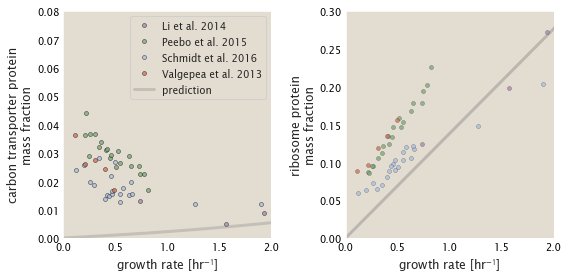

In [13]:
# Instantiate the figure canvas
fig, ax = plt.subplots(1, 2, figsize=(8, 4))



for _ax in ax:
    _ax.xaxis.set_tick_params(labelsize=10)
    _ax.yaxis.set_tick_params(labelsize=10)
    # ax.set_yscale('log')
    _ax.set_xlim([0, 2])
    
    _ax.set_xlabel('growth rate [hr$^{-1}$]', fontsize=12)

####################################
# carbon transport -  transporters
####################################

# Define constants
theta_C = constants['dry_mass_frac']['value'] * constants['theta_C']['value']
rho = constants['density']['value']
vol = constants['volume']['value']
growth_rate = constants['growth_rate']['value']
t_double = constants['t_double']['value']
mass = constants['cell_mass']['value']
m_carbon = 12/6E11 # in pg
r_carbon = 1000 # in C / s
N_tporters = (theta_C * mass)/ (m_carbon * r_carbon * t_double)

# avg fg per transporter
c_transporters = complexes[complexes.go_terms.str.contains('GO:0009401')]
c_transporters = c_transporters[c_transporters.dataset == 'schmidt_2016']
c_transporters = c_transporters[c_transporters.condition == 'glucose']
c_mass = []
for com, d in c_transporters.groupby('complex'):
    c_mass = np.append(c_mass, d.avg_fg_per_complex.sum())

complex_avg_fg = c_mass.mean()

ax[0].set_ylabel('carbon transporter protein\nmass fraction', fontsize=12)
ax[0].set_ylim([0, 0.08])

# Plot the data
# for g, d in _carbon.groupby(['dataset', 'dataset_name']):
for g, d in complexes.groupby(['dataset', 'dataset_name']):#, 'growth_rate_hr',  'condition']):
    frac =  [d_[d_.go_terms.str.contains('GO:0009401')]['fg_per_cell'].sum()/ d_['fg_per_cell'].sum() for i, d_ in d.groupby(['growth_rate_hr', 'condition'])]
    gr = [d_.growth_rate_hr.unique()[0] for i, d_ in d.groupby(['growth_rate_hr', 'condition'])]
    _ = ax[0].plot(gr, frac,#d_carbon['fg_per_cell'].sum()/ d['fg_per_cell'].sum(), 
                'o', ms=4, color=dataset_colors[g[0]],
            alpha=0.75, markeredgewidth=0.5, markeredgecolor='k', label=g[1])


ax[0].plot(growth_rate, N_tporters*complex_avg_fg/prot.size.lambda2P(growth_rate), '-', 
           lw=3, color='grey', label='prediction',
alpha=0.3)
ax[0].legend(fontsize=10)



####################################
# protein translation - ribosomes
####################################

L_R = 7459.0 # length of all subunits in ribosomes, in amino acids
frac = np.linspace(0,0.3,100)
# gr = (17.1 * frac/ L_R) * 3600
gr = (15 * frac/ L_R) * 3600

# Plot the cell size dependence
ax[1].plot(gr, frac, 
        lw=3, color='grey', alpha=0.4)

    
    
for g, d in df_ribo_frac.groupby(['dataset', 'condition', 'dataset_name']):#, 'growth_rate_hr', 'dataset_name']):
    ax[1].plot(d.growth_rate_hr, d['frac_ribo'], 'o', color=dataset_colors[g[0]],
                    alpha=0.75, markeredgecolor='k', markeredgewidth=0.25,
                    label = g[2], ms=4, zorder=10)

ax[1].set_ylabel('ribosome protein\nmass fraction', fontsize=12)
ax[1].set_ylim([0, 0.3])
    
plt.tight_layout()
plt.savefig('../../figures/reviewer1_mass_fraction_eg.pdf')